In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
petrol_data=pd.read_csv("petrol_data.csv")
petrol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
petrol_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
petrol_data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
X=petrol_data.drop("Petrol_Consumption",axis=1)
Y=petrol_data["Petrol_Consumption"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
dec.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [9]:
Y_pred=dec.predict(X_test)

In [12]:
df=pd.DataFrame({"Actual":Y_test,"Precited":Y_pred})

In [13]:
df.head()

,Actual,Precited
29,534,541.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,631.0


In [15]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean squared error:",metrics.mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared error:",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean absolute error: 51.8
Mean squared error: 4699.4
Root Mean Squared error: 68.55216991459862


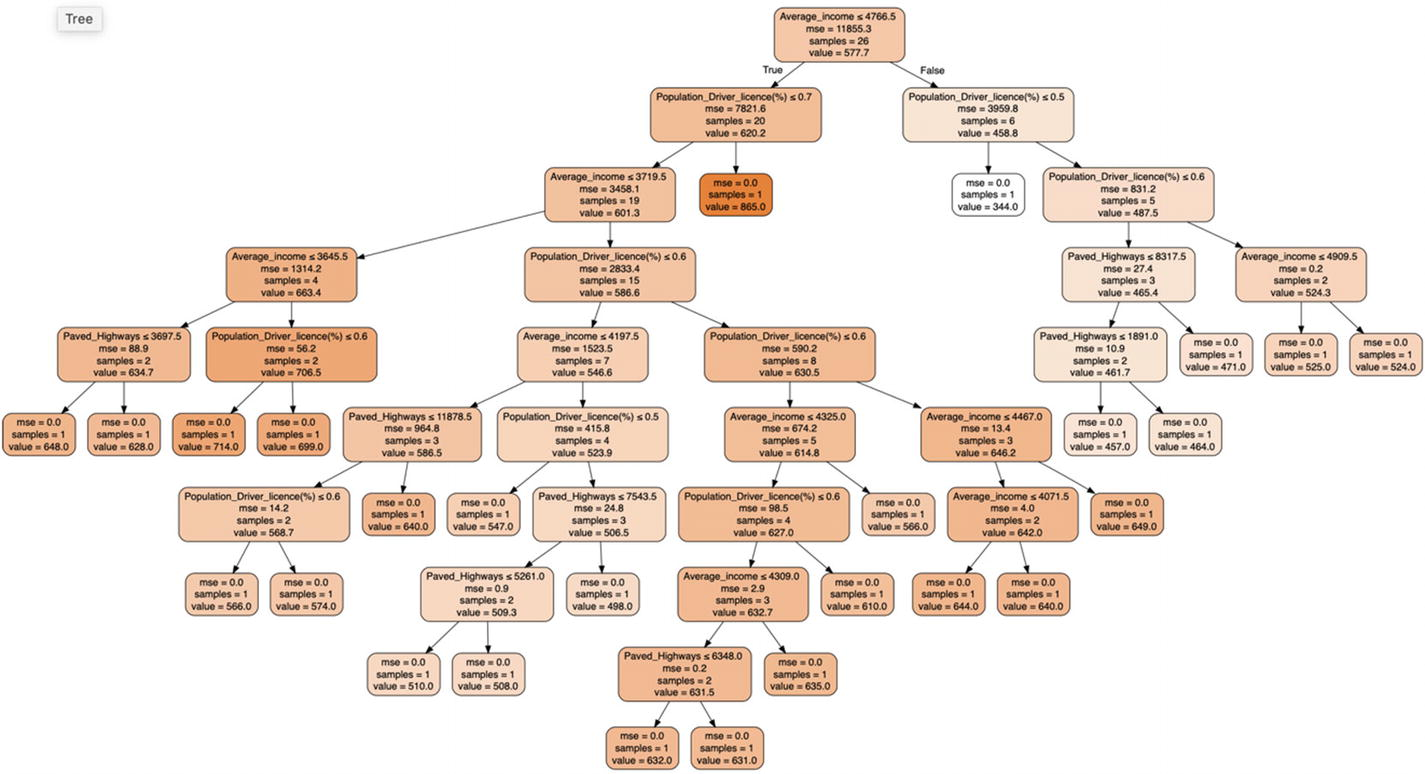